In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만들기 - [14.0, 1.0]을 [14.0, 0.0]으로 변경
data = [[2.0, 0.0], [4.0, 0.0], [6.0, 0.0], [8.0, 1.0], [10.0, 1.0], [12.0, 1.0], [14.0, 0.0]]

# 기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

# 학습률
lr = 0.05

# 시그모이드 함수를 정의
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

# MSE 함수
def error_sum():
  return ((y_data - sigmoid(a*x_data + b))**2).mean()

x = [i[0] for i in data]
y = [i[1] for i in data]

# 배열을 벡터로 변환
x_data = np.array(x)
y_data = np.array(y)

loss = []

# 경사 하강법을 실행
for i in range(10001):
    a_diff = (1/len(x_data))*sum(x_data*(sigmoid(a*x_data + b) - y_data))
    b_diff = (1/len(x_data))*sum(sigmoid(a*x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff

    error = error_sum()
    loss.append(error)

    # error가 발산할 경우 학습률을 0.01씩 감소시킴
    if i > 0 and error > prev_error:
        lr -= 0.01

    # prev_error 값 업데이트
    prev_error = error


    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력
    if i % 1000 == 0:
        print("epoch=%d, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        print("Error value: %.04f " % error)

epoch=0, 기울기=0.0143, 절편=-0.0036
Error value: 0.2488 
epoch=1000, 기울기=0.2108, 절편=-1.9640
Error value: 0.2004 
epoch=2000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=3000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=4000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=5000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=6000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=7000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=8000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=9000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 
epoch=10000, 기울기=0.2260, 절편=-2.1163
Error value: 0.2002 


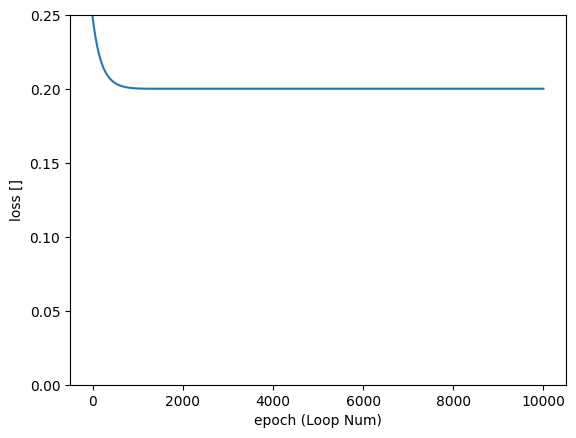

In [ ]:
# loss 값 2차원 그래프로 출력
plt.plot(range(len(loss)), loss)
plt.ylim(0.0, 0.25)
plt.xlabel('epoch (Loop Num)')
plt.ylabel('loss []')
plt.show()

In [ ]:
# 도출된 예측 함수에 대해서, 모든 입력에 대한 예측 출력 값 확인
for i in range(x_data.shape[0]):
  print("Input: %.01f, Real: %.01f, Expect:%.04f" % (x_data[i], y_data[i], sigmoid(a*x_data[i] + b)))

Input: 2.0, Real: 0.0, Expect:0.1592
Input: 4.0, Real: 0.0, Expect:0.2293
Input: 6.0, Real: 0.0, Expect:0.3186
Input: 8.0, Real: 1.0, Expect:0.4235
Input: 10.0, Real: 1.0, Expect:0.5359
Input: 12.0, Real: 1.0, Expect:0.6447
Input: 14.0, Real: 0.0, Expect:0.7403


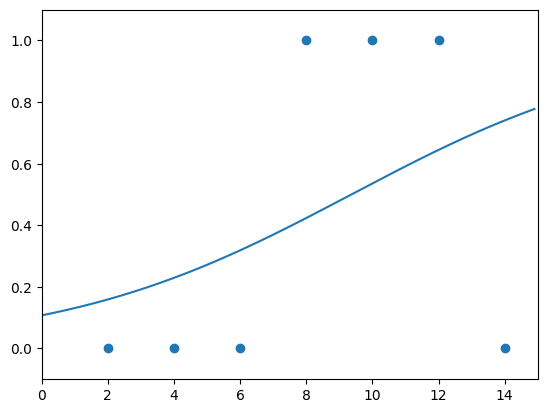

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 시그모이드 예측 함수 그래프 그리기
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()